<span style="background-color: #FFFF00"><h1> Notebook 1</h1> </span>

**Project: "Intra-Regional Migration and Transportation in New York Metro Area"**

***Due to the large data our team is working with, there are a total of four notebooks submitted for this midterm (Two from each team member)</font>***

***I also outlined the notebook into the Table of Content - hope it helps to read through the notebook</font>***

<h2>
<code style="background:grey;color:black">Research questions in this specific notebook:
</code>
</h2>

<p>
In this section, we reselect many dataset in demographics, housing, and economy and combine them into one CSV so that we can use def function coding to create graph more efficiently.  
<p>
 


<h2>
<code style="background:grey;color:black">Section 0. Import All Modules and Set Up Notebook
</code>
</h2>

In [1]:
# Import all modules I will be using in this note book.

import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

In [2]:
# Pre-set some system settings for better working workspace here.

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


<h2>
<code style="background:grey;color:black">Section 1. Prepare Basic Geo-Data
</h2>

In this section, I will clean and prepare basic geo dataset for future use in this notebook. I will work with both SHP file and CSV file to create a list of county in the US with all geo information. Those data are used to be matched with census data and then map the findings. 

In [3]:
# Import the raw data that contains geo information. It is a SHP file.

countyborder = gpd.read_file('data/04_Basemap_countyborder/cb_2018_us_county_500k.shp')

In [4]:
# I want to take a look what it looks like.

countyborder.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,21,007,00516850,0500000US21007,21007,Ballard,06,639387454,69473325,"POLYGON ((-89.18137 37.04630, -89.17938 37.053..."
1,21,017,00516855,0500000US21017,21017,Bourbon,06,750439351,4829777,"POLYGON ((-84.44266 38.28324, -84.44114 38.283..."
2,21,031,00516862,0500000US21031,21031,Butler,06,1103571974,13943044,"POLYGON ((-86.94486 37.07341, -86.94346 37.074..."
3,21,065,00516879,0500000US21065,21065,Estill,06,655509930,6516335,"POLYGON ((-84.12662 37.64540, -84.12483 37.646..."
4,21,069,00516881,0500000US21069,21069,Fleming,06,902727151,7182793,"POLYGON ((-83.98428 38.44549, -83.98246 38.450..."


In [5]:
# Clean out the dataset by keeping the columns I need.

columns_to_keep4 = ['GEOID','geometry','NAME','STATEFP']
countyborder_trimmed1 = countyborder [columns_to_keep4]
countyborder_trimmed1.head()

,GEOID,geometry,NAME,STATEFP
0,21007,"POLYGON ((-89.18137 37.04630, -89.17938 37.053...",Ballard,21
1,21017,"POLYGON ((-84.44266 38.28324, -84.44114 38.283...",Bourbon,21
2,21031,"POLYGON ((-86.94486 37.07341, -86.94346 37.074...",Butler,21
3,21065,"POLYGON ((-84.12662 37.64540, -84.12483 37.646...",Estill,21
4,21069,"POLYGON ((-83.98428 38.44549, -83.98246 38.450...",Fleming,21


In [6]:
# The geo data above misses the state name.
# So, I will import anly CSV data that contains the state info with the identifiers (STATEFP).

state_name = pd.read_csv('data/07_Basemap_State_FIPS.csv',dtype={'STATEFP':str})
state_name.head(5)

,STATEFP,Name
0,00,Northeast Region
1,00,New England Division
2,09,Connecticut
3,23,Maine
4,25,Massachusetts


In [7]:
# I will merge those two geo dataset toeghter according to "STATEFP", the shared identifers

countyborder_trimmed2 = countyborder_trimmed1.merge(state_name,on ='STATEFP',how='left')

countyborder_trimmed2.head()

,GEOID,geometry,NAME,STATEFP,Name
0,21007,"POLYGON ((-89.18137 37.04630, -89.17938 37.053...",Ballard,21,Kentucky
1,21017,"POLYGON ((-84.44266 38.28324, -84.44114 38.283...",Bourbon,21,Kentucky
2,21031,"POLYGON ((-86.94486 37.07341, -86.94346 37.074...",Butler,21,Kentucky
3,21065,"POLYGON ((-84.12662 37.64540, -84.12483 37.646...",Estill,21,Kentucky
4,21069,"POLYGON ((-83.98428 38.44549, -83.98246 38.450...",Fleming,21,Kentucky


In [8]:
# For better viewing, I create a new column that contains both the county name column and the state name column

countyborder_trimmed2 ['County_Name'] = countyborder_trimmed2['NAME'] + ','+' '+countyborder_trimmed2['Name']

countyborder_trimmed2 = countyborder_trimmed2.drop (['NAME','Name'],axis=1)
countyborder_trimmed2.head()

,GEOID,geometry,STATEFP,County_Name
0,21007,"POLYGON ((-89.18137 37.04630, -89.17938 37.053...",21,"Ballard, Kentucky"
1,21017,"POLYGON ((-84.44266 38.28324, -84.44114 38.283...",21,"Bourbon, Kentucky"
2,21031,"POLYGON ((-86.94486 37.07341, -86.94346 37.074...",21,"Butler, Kentucky"
3,21065,"POLYGON ((-84.12662 37.64540, -84.12483 37.646...",21,"Estill, Kentucky"
4,21069,"POLYGON ((-83.98428 38.44549, -83.98246 38.450...",21,"Fleming, Kentucky"


In [9]:
countyborder_trimmed2['Region'] = 'Non_Metro_the_contiguous_US'

In [10]:
countyborder_trimmed2.head()

,GEOID,geometry,STATEFP,County_Name,Region
0,21007,"POLYGON ((-89.18137 37.04630, -89.17938 37.053...",21,"Ballard, Kentucky",Non_Metro_the_contiguous_US
1,21017,"POLYGON ((-84.44266 38.28324, -84.44114 38.283...",21,"Bourbon, Kentucky",Non_Metro_the_contiguous_US
2,21031,"POLYGON ((-86.94486 37.07341, -86.94346 37.074...",21,"Butler, Kentucky",Non_Metro_the_contiguous_US
3,21065,"POLYGON ((-84.12662 37.64540, -84.12483 37.646...",21,"Estill, Kentucky",Non_Metro_the_contiguous_US
4,21069,"POLYGON ((-83.98428 38.44549, -83.98246 38.450...",21,"Fleming, Kentucky",Non_Metro_the_contiguous_US


In [11]:
NYC_5County = ['36005','36047','36061','36081','36085']
NonNYC_Metro = ['09001','09005','09009','34003','34013','34017','34019','34021','34023',
               '34025','34027','34029','34031','34035','34037','34039','36027','36059',
               '36071','36079','36087','36103','36111','36119','42089','42103']
NonContiguous = ['72','02','15','66','69','78','60']

In [12]:
def regionbyGEOID_NYC(name):
    countyborder_trimmed2.loc[countyborder_trimmed2['GEOID'] == name,'Region'] = 'NYC'

def regionbyGEOID_NonNYC_Metro(name):
    countyborder_trimmed2.loc[countyborder_trimmed2['GEOID'] == name,'Region'] = 'NonNYC_Metro'

def regionbyGEOID_NonContiguous(name):
    countyborder_trimmed2.loc[countyborder_trimmed2['STATEFP'] == name,'Region'] = 'Non_the_contiguous_US'

In [13]:
for GEOID in NYC_5County:
    regionbyGEOID_NYC(GEOID)
    
NYC_5county = countyborder_trimmed2[countyborder_trimmed2.Region == 'NYC']
NYC_5county

,GEOID,geometry,STATEFP,County_Name,Region
165,36047,"POLYGON ((-74.04201 40.62605, -74.04199 40.626...",36,"Kings, New York",NYC
169,36081,"POLYGON ((-73.96262 40.73903, -73.96138 40.742...",36,"Queens, New York",NYC
989,36061,"MULTIPOLYGON (((-73.99950 40.70033, -73.99750 ...",36,"New York, New York",NYC
2217,36085,"MULTIPOLYGON (((-74.16170 40.64586, -74.16060 ...",36,"Richmond, New York",NYC
2834,36005,"MULTIPOLYGON (((-73.77336 40.85945, -73.77244 ...",36,"Bronx, New York",NYC


In [14]:
for GEOID in NonNYC_Metro:
    regionbyGEOID_NonNYC_Metro(GEOID)
    
NonNYC_Metro = countyborder_trimmed2[countyborder_trimmed2.Region == 'NonNYC_Metro']
NonNYC_Metro.head()

,GEOID,geometry,STATEFP,County_Name,Region
56,09009,"MULTIPOLYGON (((-72.76143 41.24233, -72.75973 ...",09,"New Haven, Connecticut",NonNYC_Metro
153,34003,"POLYGON ((-74.27066 41.02103, -74.25046 41.060...",34,"Bergen, New Jersey",NonNYC_Metro
155,34013,"POLYGON ((-74.37623 40.76275, -74.37389 40.762...",34,"Essex, New Jersey",NonNYC_Metro
156,34023,"POLYGON ((-74.63023 40.34313, -74.63047 40.344...",34,"Middlesex, New Jersey",NonNYC_Metro
445,34019,"POLYGON ((-75.19511 40.57969, -75.19466 40.581...",34,"Hunterdon, New Jersey",NonNYC_Metro


In [15]:
for GEOID in NonContiguous:
    regionbyGEOID_NonContiguous(GEOID)

NonCountiguous = countyborder_trimmed2[countyborder_trimmed2.Region == 'Non_the_contiguous_US']
NonCountiguous.head()

,GEOID,geometry,STATEFP,County_Name,Region
26,02016,"MULTIPOLYGON (((179.48246 51.98283, 179.48656 ...",02,"Aleutians West, Alaska",Non_the_contiguous_US
27,02130,"MULTIPOLYGON (((-130.98311 55.36598, -130.9809...",02,"Ketchikan Gateway, Alaska",Non_the_contiguous_US
28,02180,"MULTIPOLYGON (((-161.31946 64.12363, -161.3183...",02,"Nome, Alaska",Non_the_contiguous_US
29,02282,"MULTIPOLYGON (((-139.51201 59.70289, -139.5095...",02,"Yakutat, Alaska",Non_the_contiguous_US
86,15007,"MULTIPOLYGON (((-159.78794 22.03010, -159.7864...",15,"Kauai, Hawaii",Non_the_contiguous_US


<h3>
<code style="background:grey;color:red">The Follwing Dataset is Ready: List of All US Counties with Geo Info:
</code>
</h3>

In [16]:
# I don't need "STATEFP" and "CountyName" column anymore. Now I'm gonna drop it for clearning.

county_geodata_ready = countyborder_trimmed2.drop(['STATEFP','County_Name'],axis=1)

county_geodata_ready.head()

,GEOID,geometry,Region
0,21007,"POLYGON ((-89.18137 37.04630, -89.17938 37.053...",Non_Metro_the_contiguous_US
1,21017,"POLYGON ((-84.44266 38.28324, -84.44114 38.283...",Non_Metro_the_contiguous_US
2,21031,"POLYGON ((-86.94486 37.07341, -86.94346 37.074...",Non_Metro_the_contiguous_US
3,21065,"POLYGON ((-84.12662 37.64540, -84.12483 37.646...",Non_Metro_the_contiguous_US
4,21069,"POLYGON ((-83.98428 38.44549, -83.98246 38.450...",Non_Metro_the_contiguous_US


<h3>
<code style="background:grey;color:red">The Following Dataset is Ready: List of NYC Metro Counties with Geo Info:
</code>
</h3>

In [17]:
# I want to create a new dataframe that only contains the geo data for NYC_Metro.
# This is especially important when I am going to map out the findings just for NYC_Metro. 

NonNYC_Metro_geodata_ready = county_geodata_ready[county_geodata_ready.Region == 'NonNYC_Metro']

NonNYC_Metro_geodata_ready = NonNYC_Metro_geodata_ready.reset_index(drop=True)

NonNYC_Metro_geodata_ready

,GEOID,geometry,Region
0,09009,"MULTIPOLYGON (((-72.76143 41.24233, -72.75973 ...",NonNYC_Metro
1,34003,"POLYGON ((-74.27066 41.02103, -74.25046 41.060...",NonNYC_Metro
2,34013,"POLYGON ((-74.37623 40.76275, -74.37389 40.762...",NonNYC_Metro
3,34023,"POLYGON ((-74.63023 40.34313, -74.63047 40.344...",NonNYC_Metro
4,34019,"POLYGON ((-75.19511 40.57969, -75.19466 40.581...",NonNYC_Metro
5,34021,"POLYGON ((-74.94228 40.34089, -74.93228 40.339...",NonNYC_Metro
6,34025,"POLYGON ((-74.61458 40.18238, -74.59963 40.186...",NonNYC_Metro
7,34029,"POLYGON ((-74.55311 40.07913, -74.53347 40.087...",NonNYC_Metro
8,34035,"POLYGON ((-74.79582 40.51527, -74.78903 40.512...",NonNYC_Metro
9,36103,"MULTIPOLYGON (((-72.03683 41.24984, -72.03496 ...",NonNYC_Metro




<h2>
<code style="background:grey;color:black">Section 2. Analyze Economic Changes between 2014 and 2018
</code>
</h2>

In this section, I will be processing the economic changes between the two years. There are three economic metrics I will be using: GDP, Job Number, and Income. The data process is same to each of them. I will use CSV data and later paired with geo data.

In [18]:
County_Demographics_Raw = pd.read_csv('data/County2014vs2018.csv',
                                              dtype={'GEOID':str})
County_Demographics_Raw.head()

,GEOID,Name,Total_Population_2014,Total_Population_2018,Commuter_Population_2014,Commuter_Population_2018,Mean_Household_Income_2014,Mean_Household_Income_2018,CommutingTime_2014,CommutingTime_2018,WorkFromHomePopulation_2014,WorkFromHomePopulation_2018,JobNumber_2014,JobNumber_2018,GDP_2014,GDP_2018,MedianNumberOfOwnedUnits_2014,MedianNumberOfOwnedUnits_2018,MedianRent_2014,MedianRent_2018
0,0500000US34003,"Bergen County, New Jersey",920456,929999,10216,13888,116079,130990,31.4,32.7,20692,21774,639103,666371,68259852,76957265,217432,217881,1340,1454
1,0500000US36005,"Bronx County, New York",1413566,1437872,12481,11287,49661,56328,42.6,44.8,17397,18258,446208,478475,40720621,50495114,91797,97983,1060,1176
2,0500000US36027,"Dutchess County, New York",297388,293894,4555,5408,90923,100352,31.2,32.8,7752,8395,150116,156157,12379523,14011783,74252,73809,1124,1194
3,0500000US34013,"Essex County, New Jersey",789616,793555,18249,24738,87496,99512,33.2,34.6,10885,14248,463337,489809,50749112,57829253,125432,124873,1069,1143
4,0500000US09001,"Fairfield County, Connecticut",934215,944348,28070,33893,135743,150822,28.7,30.7,24303,28010,646561,663549,82695041,90679271,228331,229169,1327,1470


In [19]:
County_Demographics_Raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   GEOID                          31 non-null     object 
 1   Name                           31 non-null     object 
 2   Total_Population_2014          31 non-null     int64  
 3   Total_Population_2018          31 non-null     int64  
 4   Commuter_Population_2014       31 non-null     int64  
 5   Commuter_Population_2018       31 non-null     int64  
 6   Mean_Household_Income_2014     31 non-null     int64  
 7   Mean_Household_Income_2018     31 non-null     int64  
 8   CommutingTime_2014             31 non-null     float64
 9   CommutingTime_2018             31 non-null     float64
 10  WorkFromHomePopulation_2014    31 non-null     int64  
 11  WorkFromHomePopulation_2018    31 non-null     int64  
 12  JobNumber_2014                 31 non-null     int64

In [20]:
County_Demographics_Raw ['GEOID'] = County_Demographics_Raw['GEOID'].str.strip().str[-5:]

In [21]:
County_Demographics_Raw.head()

,GEOID,Name,Total_Population_2014,Total_Population_2018,Commuter_Population_2014,Commuter_Population_2018,Mean_Household_Income_2014,Mean_Household_Income_2018,CommutingTime_2014,CommutingTime_2018,WorkFromHomePopulation_2014,WorkFromHomePopulation_2018,JobNumber_2014,JobNumber_2018,GDP_2014,GDP_2018,MedianNumberOfOwnedUnits_2014,MedianNumberOfOwnedUnits_2018,MedianRent_2014,MedianRent_2018
0,34003,"Bergen County, New Jersey",920456,929999,10216,13888,116079,130990,31.4,32.7,20692,21774,639103,666371,68259852,76957265,217432,217881,1340,1454
1,36005,"Bronx County, New York",1413566,1437872,12481,11287,49661,56328,42.6,44.8,17397,18258,446208,478475,40720621,50495114,91797,97983,1060,1176
2,36027,"Dutchess County, New York",297388,293894,4555,5408,90923,100352,31.2,32.8,7752,8395,150116,156157,12379523,14011783,74252,73809,1124,1194
3,34013,"Essex County, New Jersey",789616,793555,18249,24738,87496,99512,33.2,34.6,10885,14248,463337,489809,50749112,57829253,125432,124873,1069,1143
4,09001,"Fairfield County, Connecticut",934215,944348,28070,33893,135743,150822,28.7,30.7,24303,28010,646561,663549,82695041,90679271,228331,229169,1327,1470


In [22]:
County_Demographics_Merge = NonNYC_Metro_geodata_ready.merge(County_Demographics_Raw,
                                                       on='GEOID',
                                                       how='left')

In [23]:
County_Demographics_Merge

,GEOID,geometry,Region,Name,Total_Population_2014,Total_Population_2018,Commuter_Population_2014,Commuter_Population_2018,Mean_Household_Income_2014,Mean_Household_Income_2018,CommutingTime_2014,CommutingTime_2018,WorkFromHomePopulation_2014,WorkFromHomePopulation_2018,JobNumber_2014,JobNumber_2018,GDP_2014,GDP_2018,MedianNumberOfOwnedUnits_2014,MedianNumberOfOwnedUnits_2018,MedianRent_2014,MedianRent_2018
0,09009,"MULTIPOLYGON (((-72.76143 41.24233, -72.75973 ...",NonNYC_Metro,"New Haven County, Connecticut",863148,859339,4216,4394,83146,91559,24.2,25.3,14583,19041,496755,511150,46955517,53258214,206556,204295,1064,1133
1,34003,"POLYGON ((-74.27066 41.02103, -74.25046 41.060...",NonNYC_Metro,"Bergen County, New Jersey",920456,929999,10216,13888,116079,130990,31.4,32.7,20692,21774,639103,666371,68259852,76957265,217432,217881,1340,1454
2,34013,"POLYGON ((-74.37623 40.76275, -74.37389 40.762...",NonNYC_Metro,"Essex County, New Jersey",789616,793555,18249,24738,87496,99512,33.2,34.6,10885,14248,463337,489809,50749112,57829253,125432,124873,1069,1143
3,34023,"POLYGON ((-74.63023 40.34313, -74.63047 40.344...",NonNYC_Metro,"Middlesex County, New Jersey",824046,826698,18676,20419,98447,108458,32.7,33.9,13957,17423,511588,571701,55939149,63393253,183878,179974,1292,1432
4,34019,"POLYGON ((-75.19511 40.57969, -75.19466 40.581...",NonNYC_Metro,"Hunterdon County, New Jersey",126746,125051,433,635,136413,144382,33.5,34.1,4758,5777,75924,77193,7106519,7479741,39343,39290,1332,1402
5,34021,"POLYGON ((-74.94228 40.34089, -74.93228 40.339...",NonNYC_Metro,"Mercer County, New Jersey",369526,368762,7259,8216,104437,115599,27.5,28.0,8972,8815,272638,290138,29427286,33882823,85625,82934,1135,1233
6,34025,"POLYGON ((-74.61458 40.18238, -74.59963 40.186...",NonNYC_Metro,"Monmouth County, New Jersey",629702,623387,6851,7463,115245,128657,33.4,34.3,14338,17202,374889,400536,31414671,35302280,174727,172322,1241,1372
7,34029,"POLYGON ((-74.55311 40.07913, -74.53347 40.087...",NonNYC_Metro,"Ocean County, New Jersey",581413,591939,536,583,79508,90114,30.9,30.9,11095,12688,243243,269426,18897939,20741214,179925,180179,1337,1422
8,34035,"POLYGON ((-74.79582 40.51527, -74.78903 40.512...",NonNYC_Metro,"Somerset County, New Jersey",328704,330176,4389,5202,134595,149988,31.7,32.3,8847,10181,244449,261980,33153836,40134274,89848,88500,1420,1552
9,36103,"MULTIPOLYGON (((-72.03683 41.24984, -72.03496 ...",NonNYC_Metro,"Suffolk County, New York",1500373,1487901,34485,35623,109783,123111,31.1,32.4,25834,27389,861620,899618,81758730,93814566,393936,390897,1519,1698


In [24]:
County_Demographics_Analysis1 = County_Demographics_Merge


In [25]:
def ChangeCalculation(topic):
    County_Demographics_Analysis1[topic+"_Change"] = (County_Demographics_Analysis1[topic+"_2018"]-County_Demographics_Analysis1[topic+"_2014"])/County_Demographics_Analysis1[topic+"_2014"]
    
    fig, axs = plt.subplots(1, 1, figsize=(30, 30))
    ax1 = axs

    County_Demographics_Analysis1.plot(ax=ax1,
                              cmap='coolwarm',
                              column = topic+"_Change", 
                              legend=True,
                              legend_kwds={'shrink': 0.5}
                                      )

    county_geodata_ready[county_geodata_ready.Region == 'NonNYC_Metro'].plot(ax=ax1,
                                                                           facecolor='none',
                                                                           edgecolor='black',
                                                                            lw=1,
                                                                            alpha=1)

    county_geodata_ready[county_geodata_ready.Region == 'NYC'].plot(ax=ax1,
                                                                           facecolor='none',
                                                                           edgecolor='black',
                                                                            lw=1,
                                                                            alpha=1)

    ax1.axis("off")
    ax1.set_title(topic+"_Change - 2014 vs 2018",fontsize = 50)

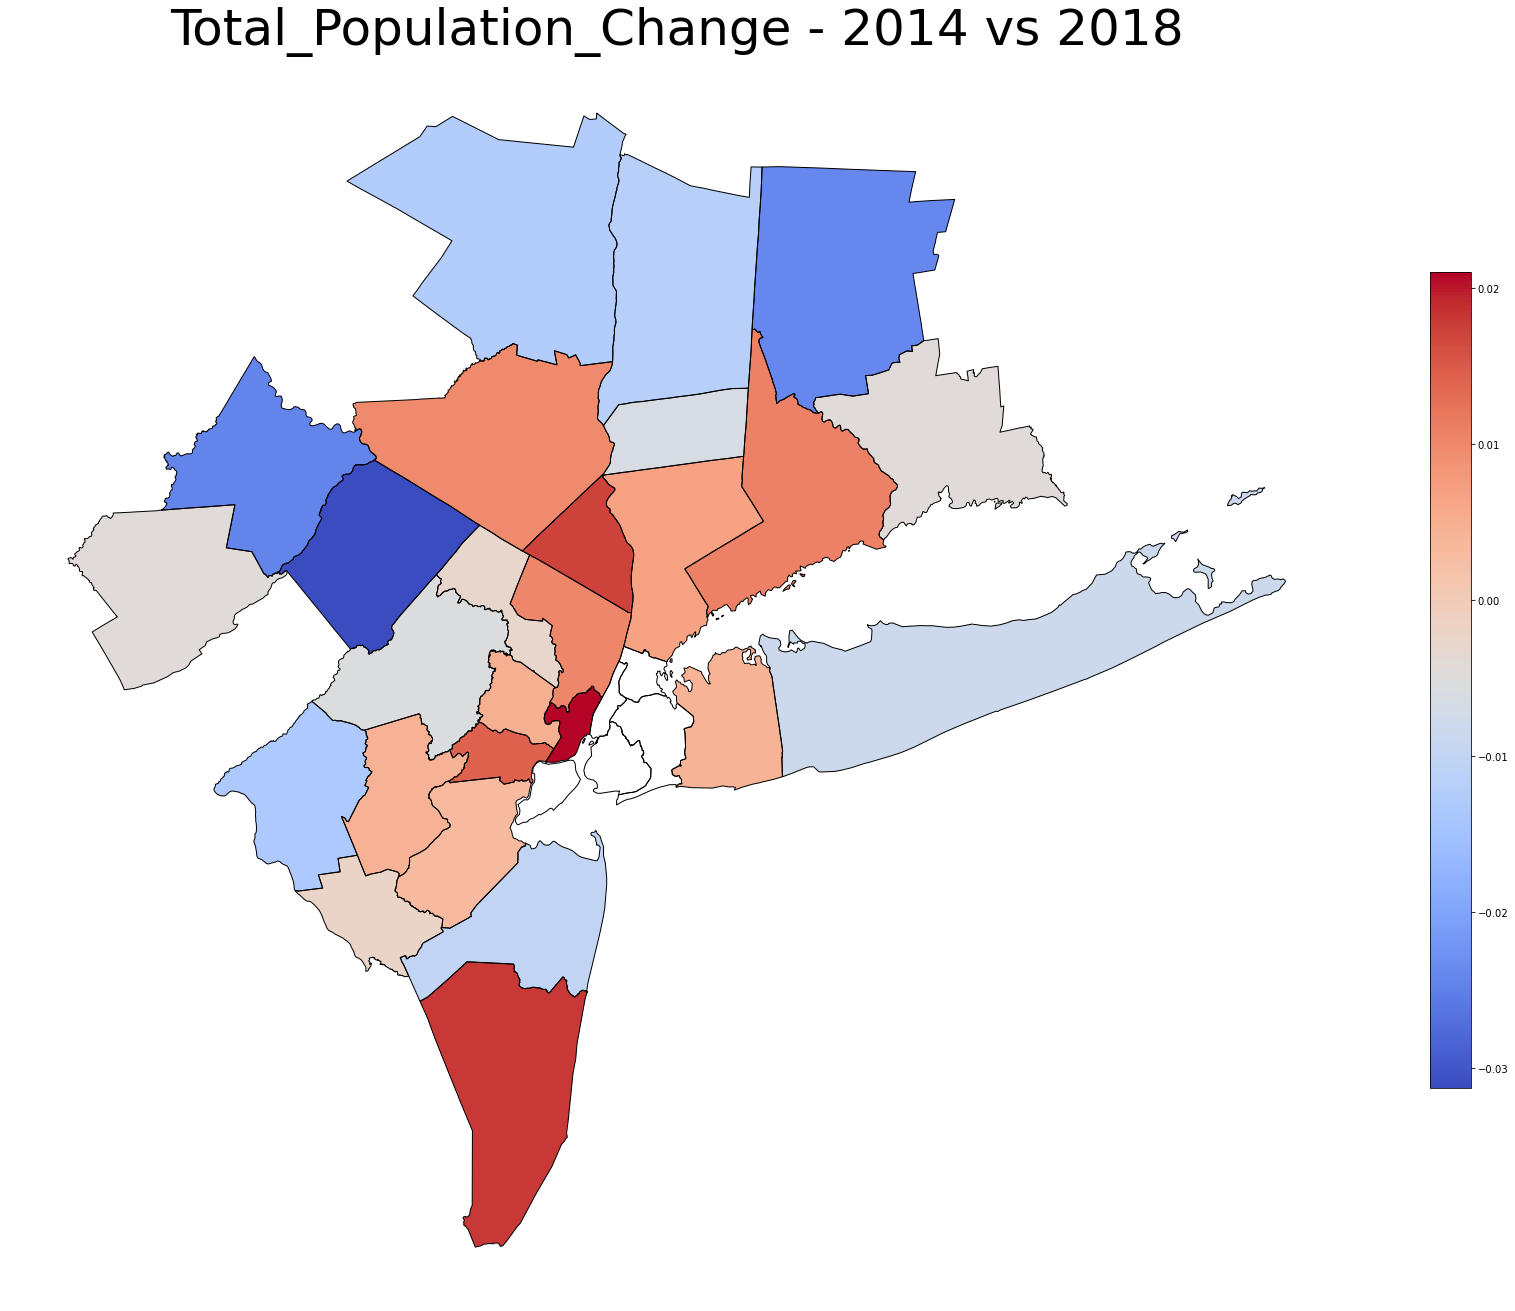

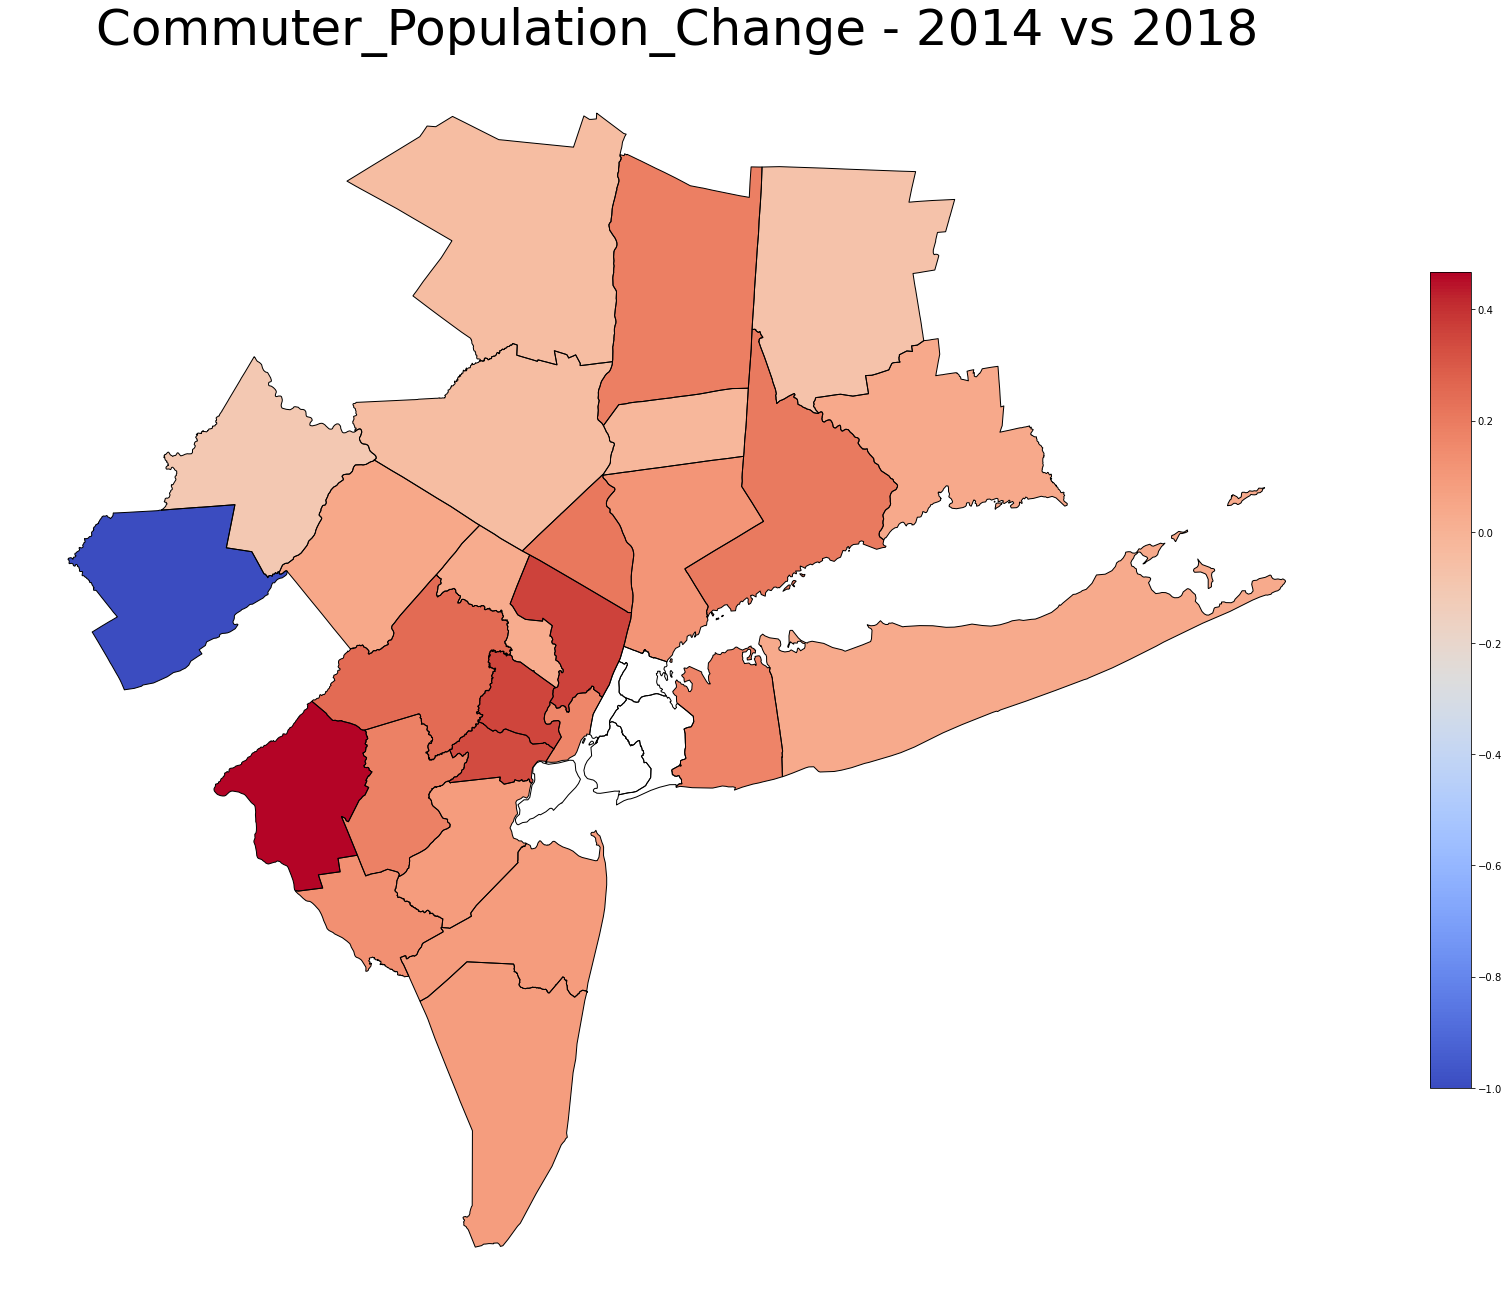

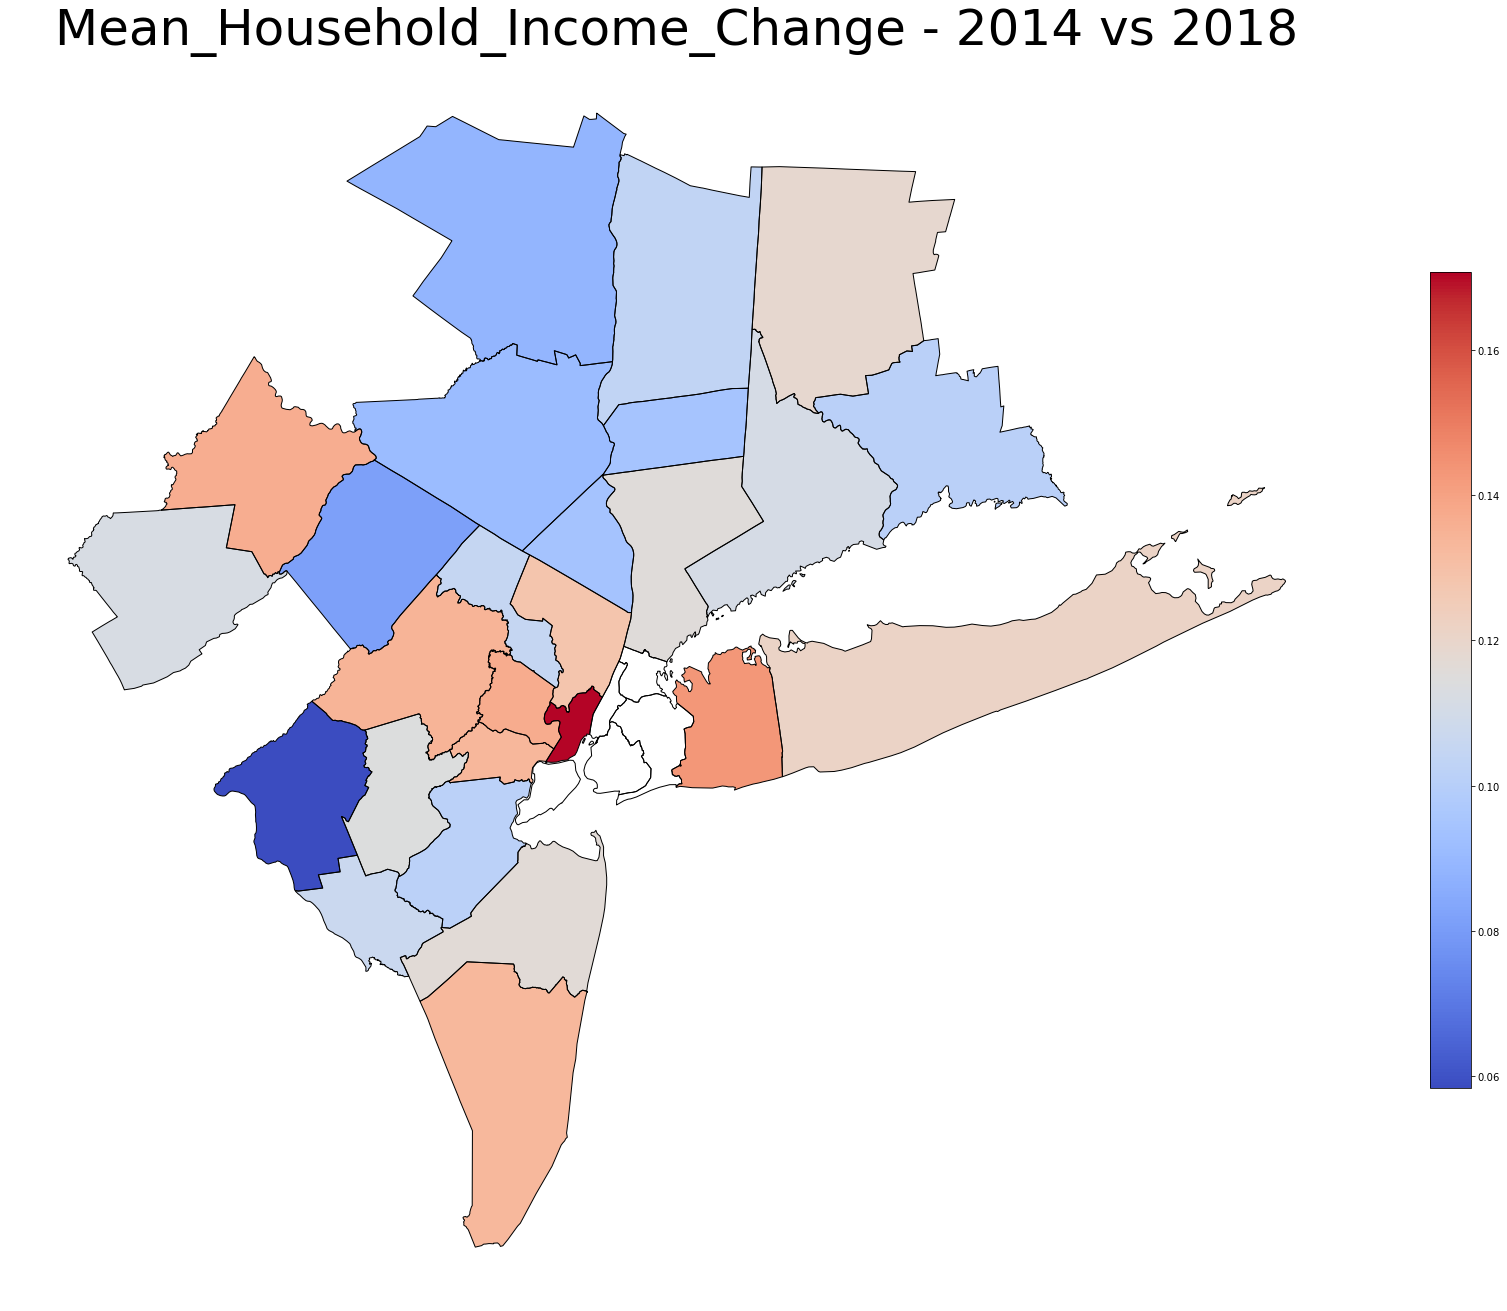

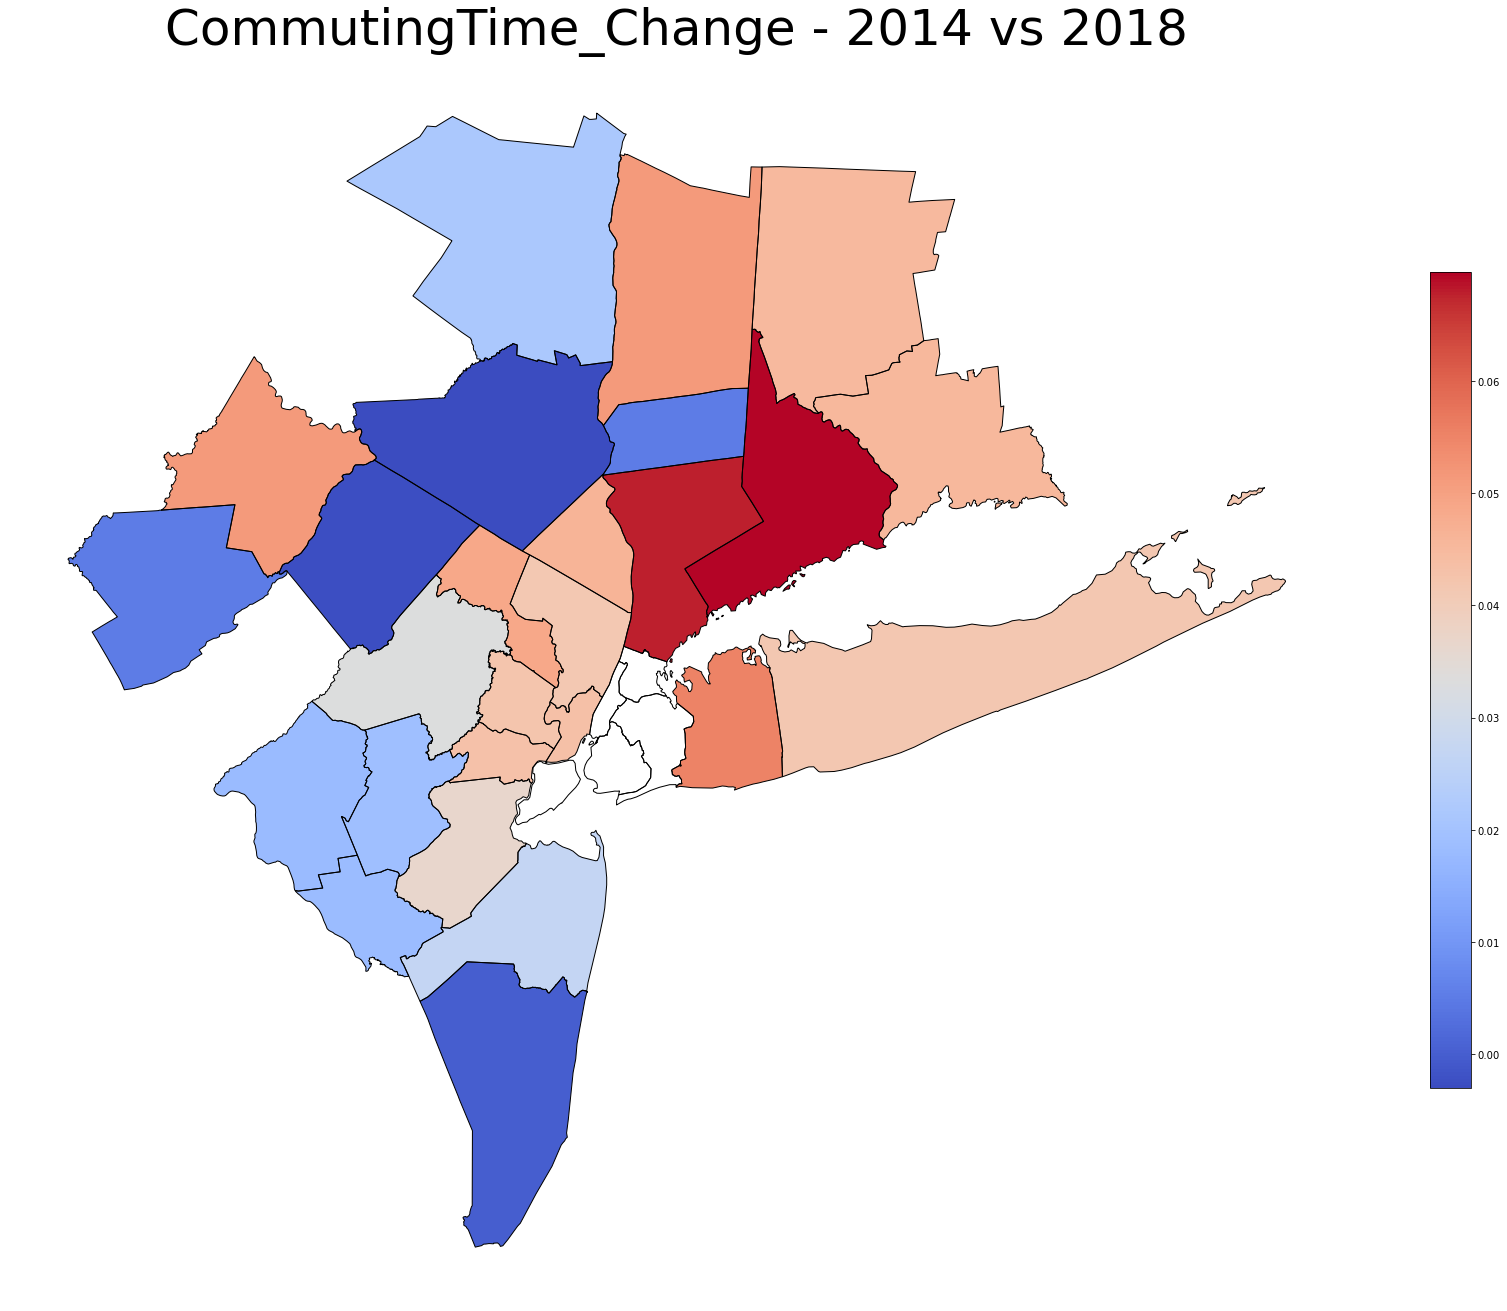

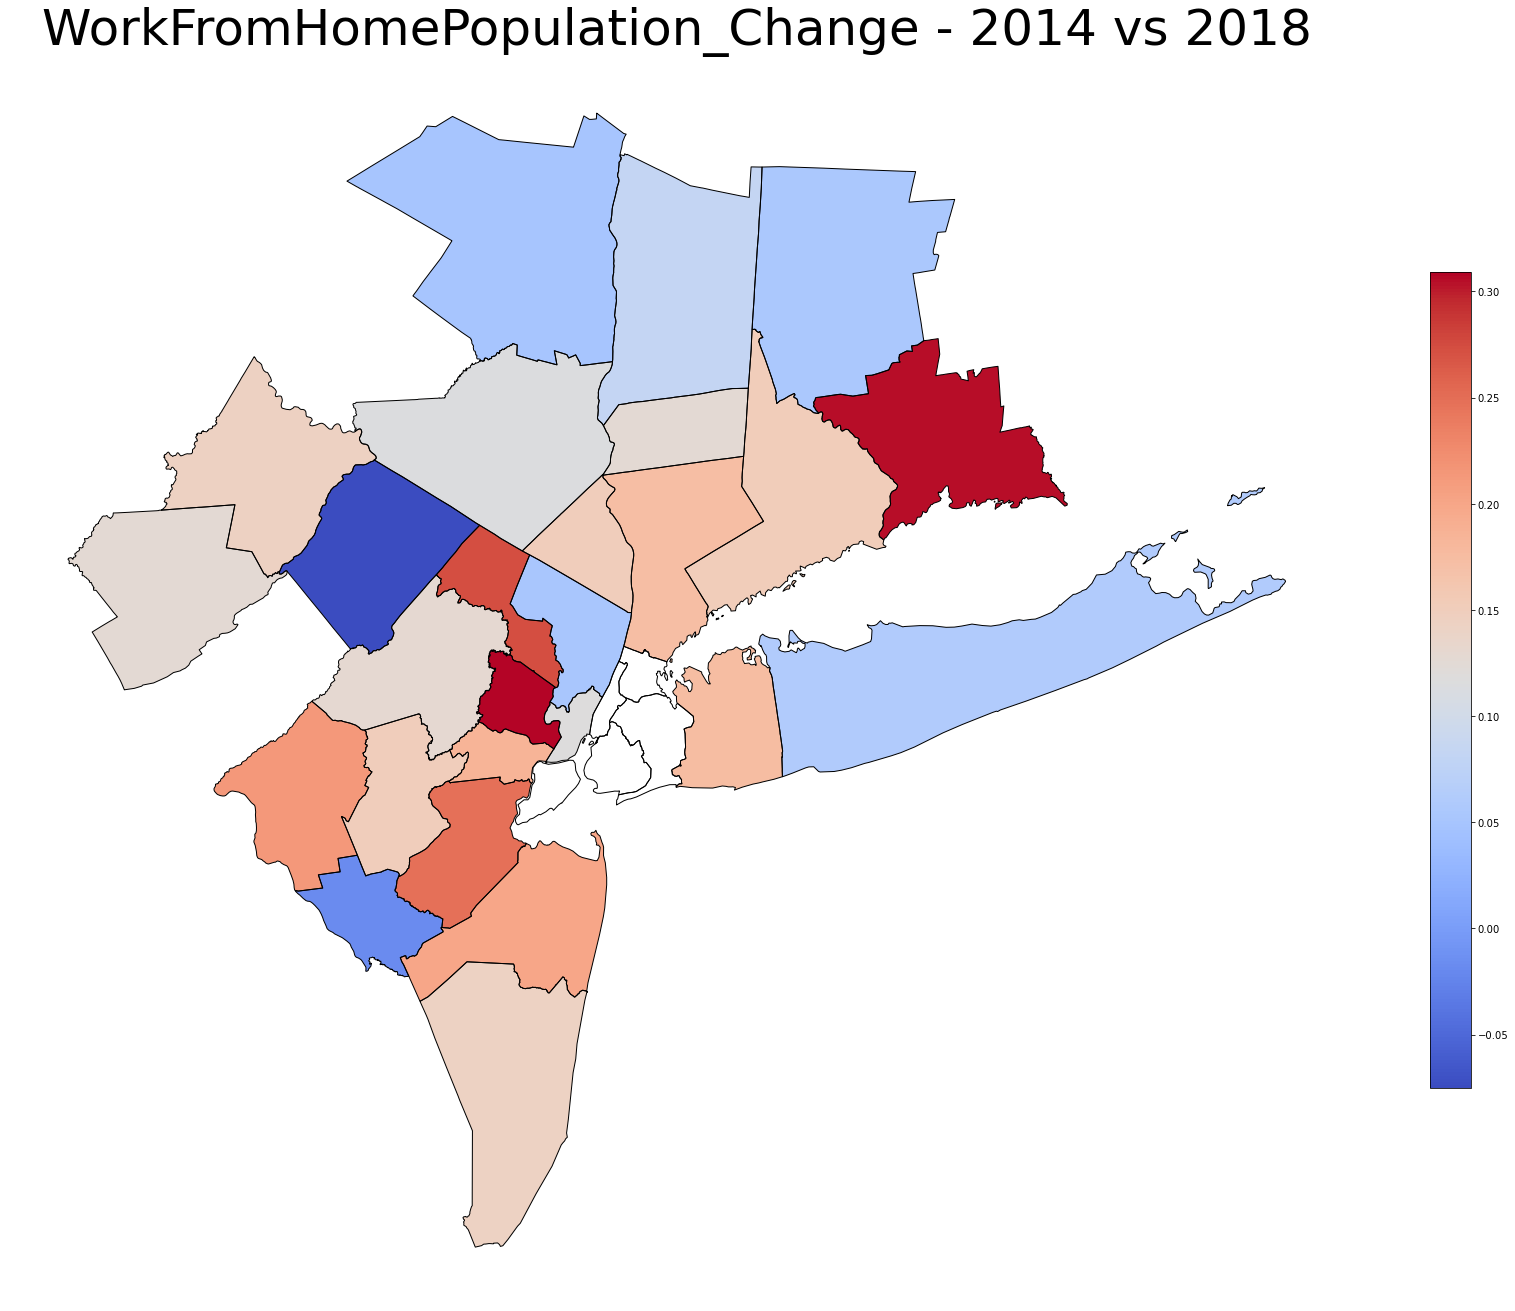

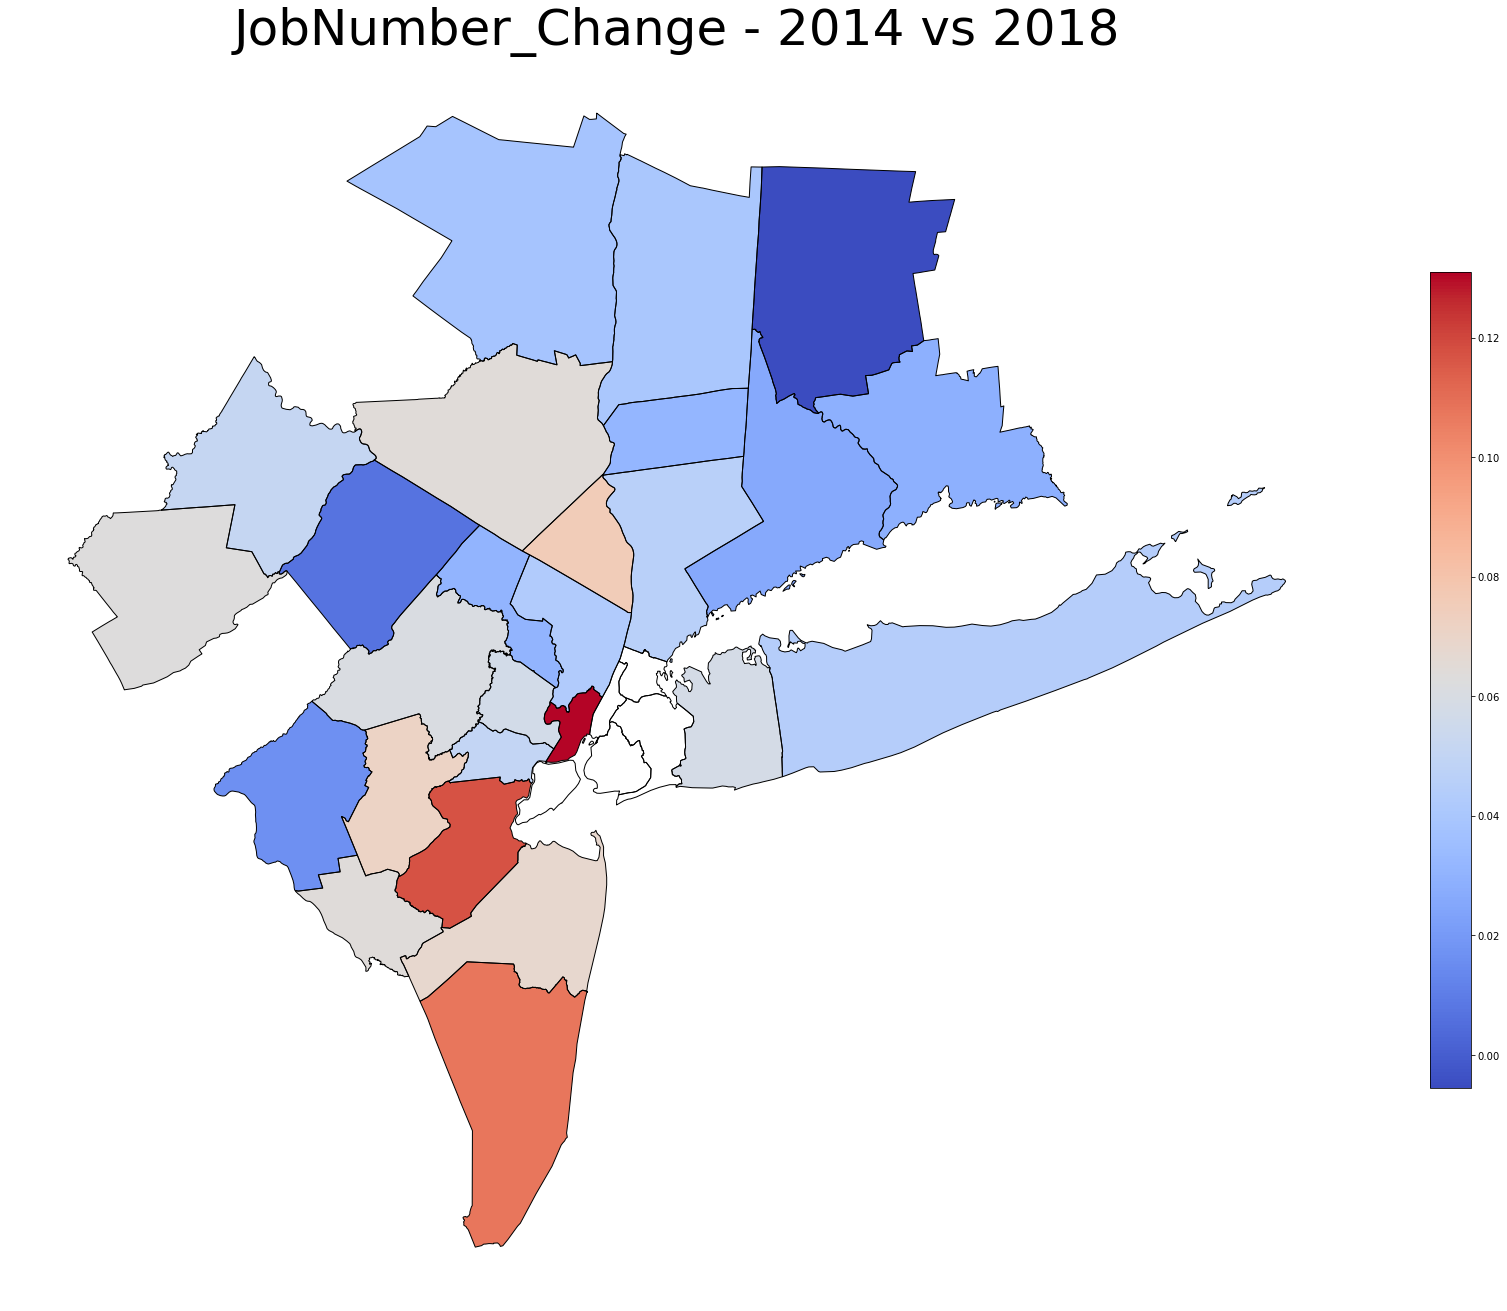

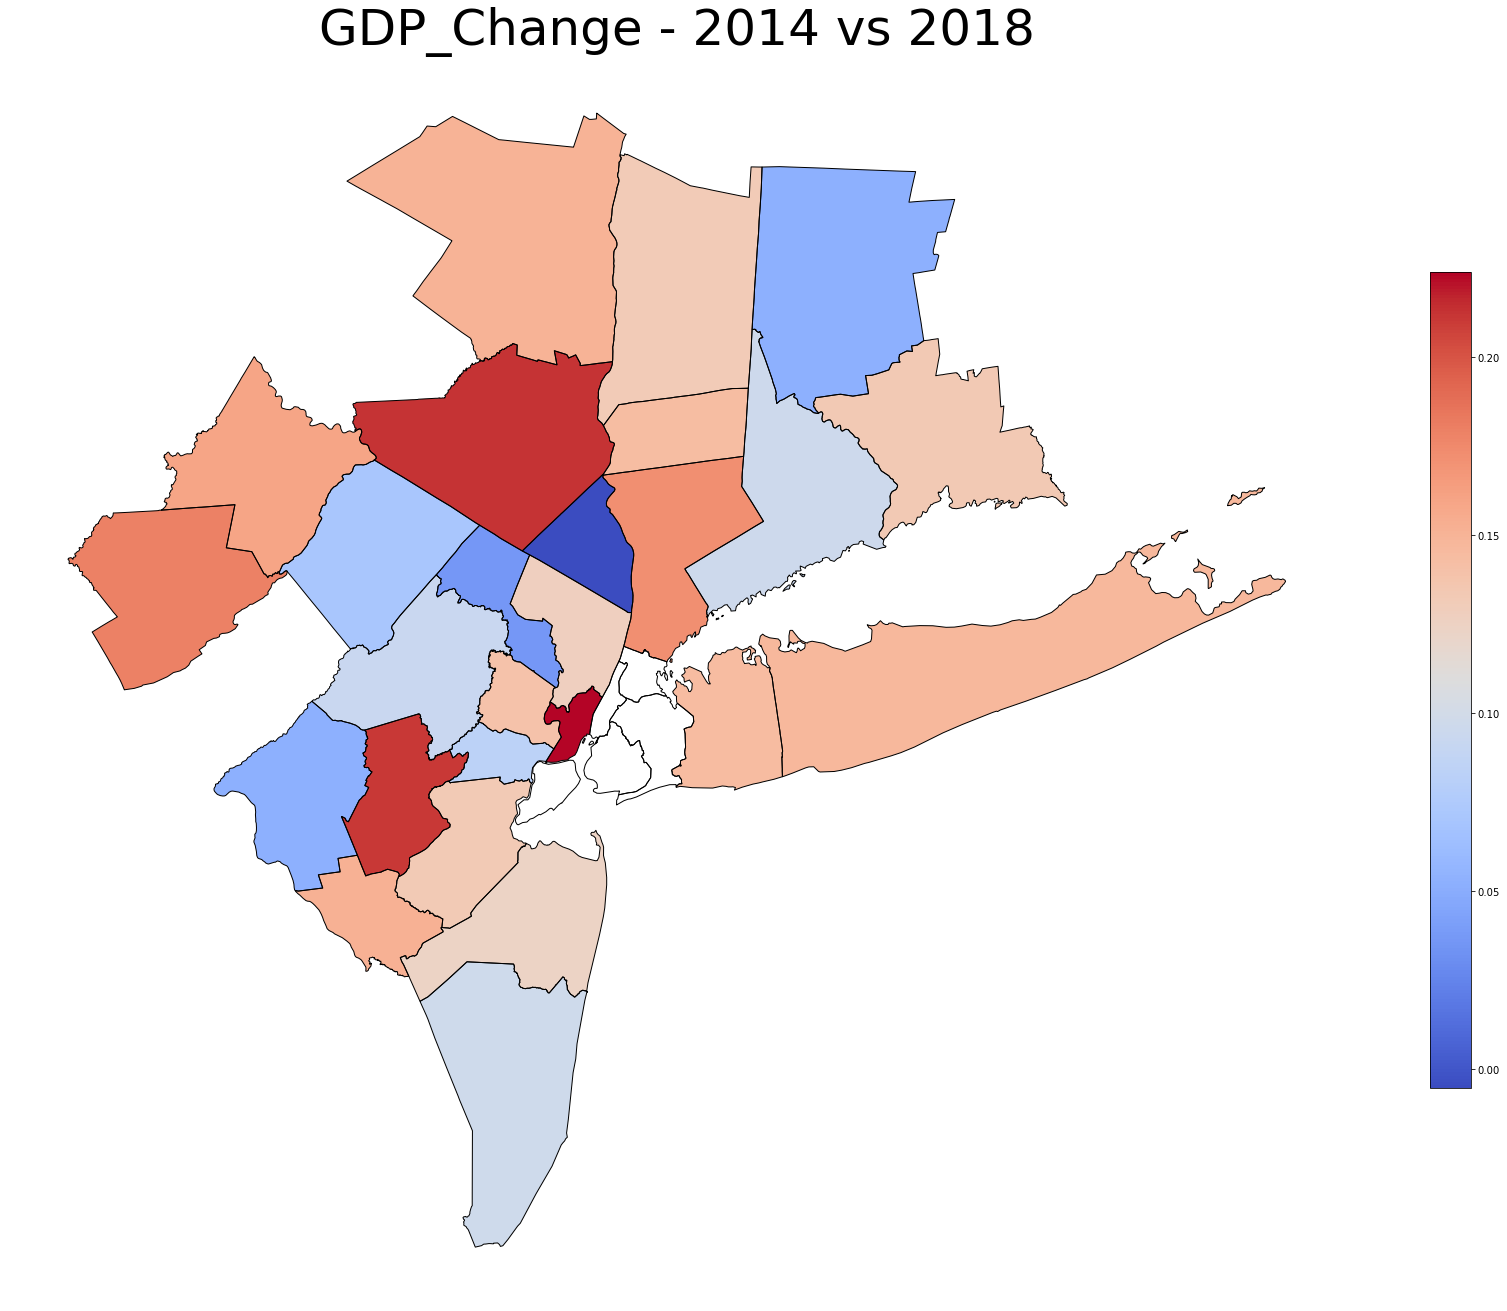

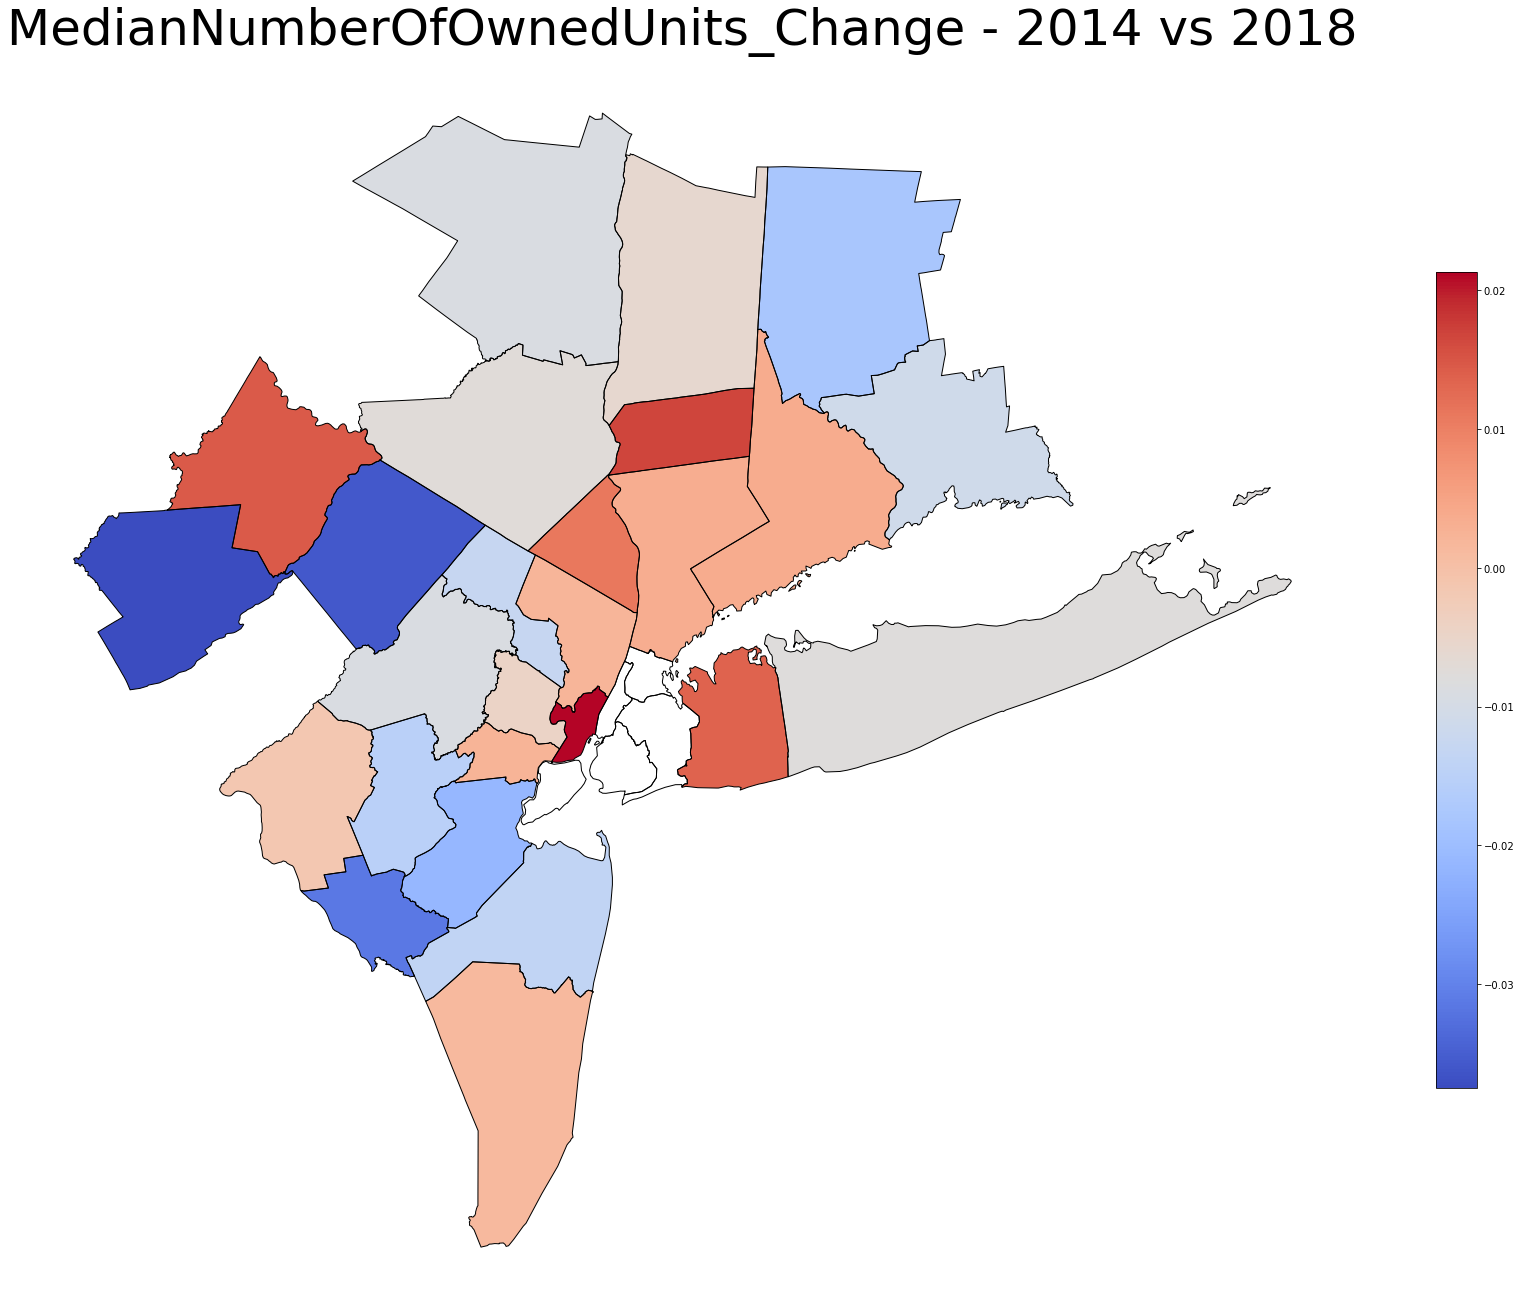

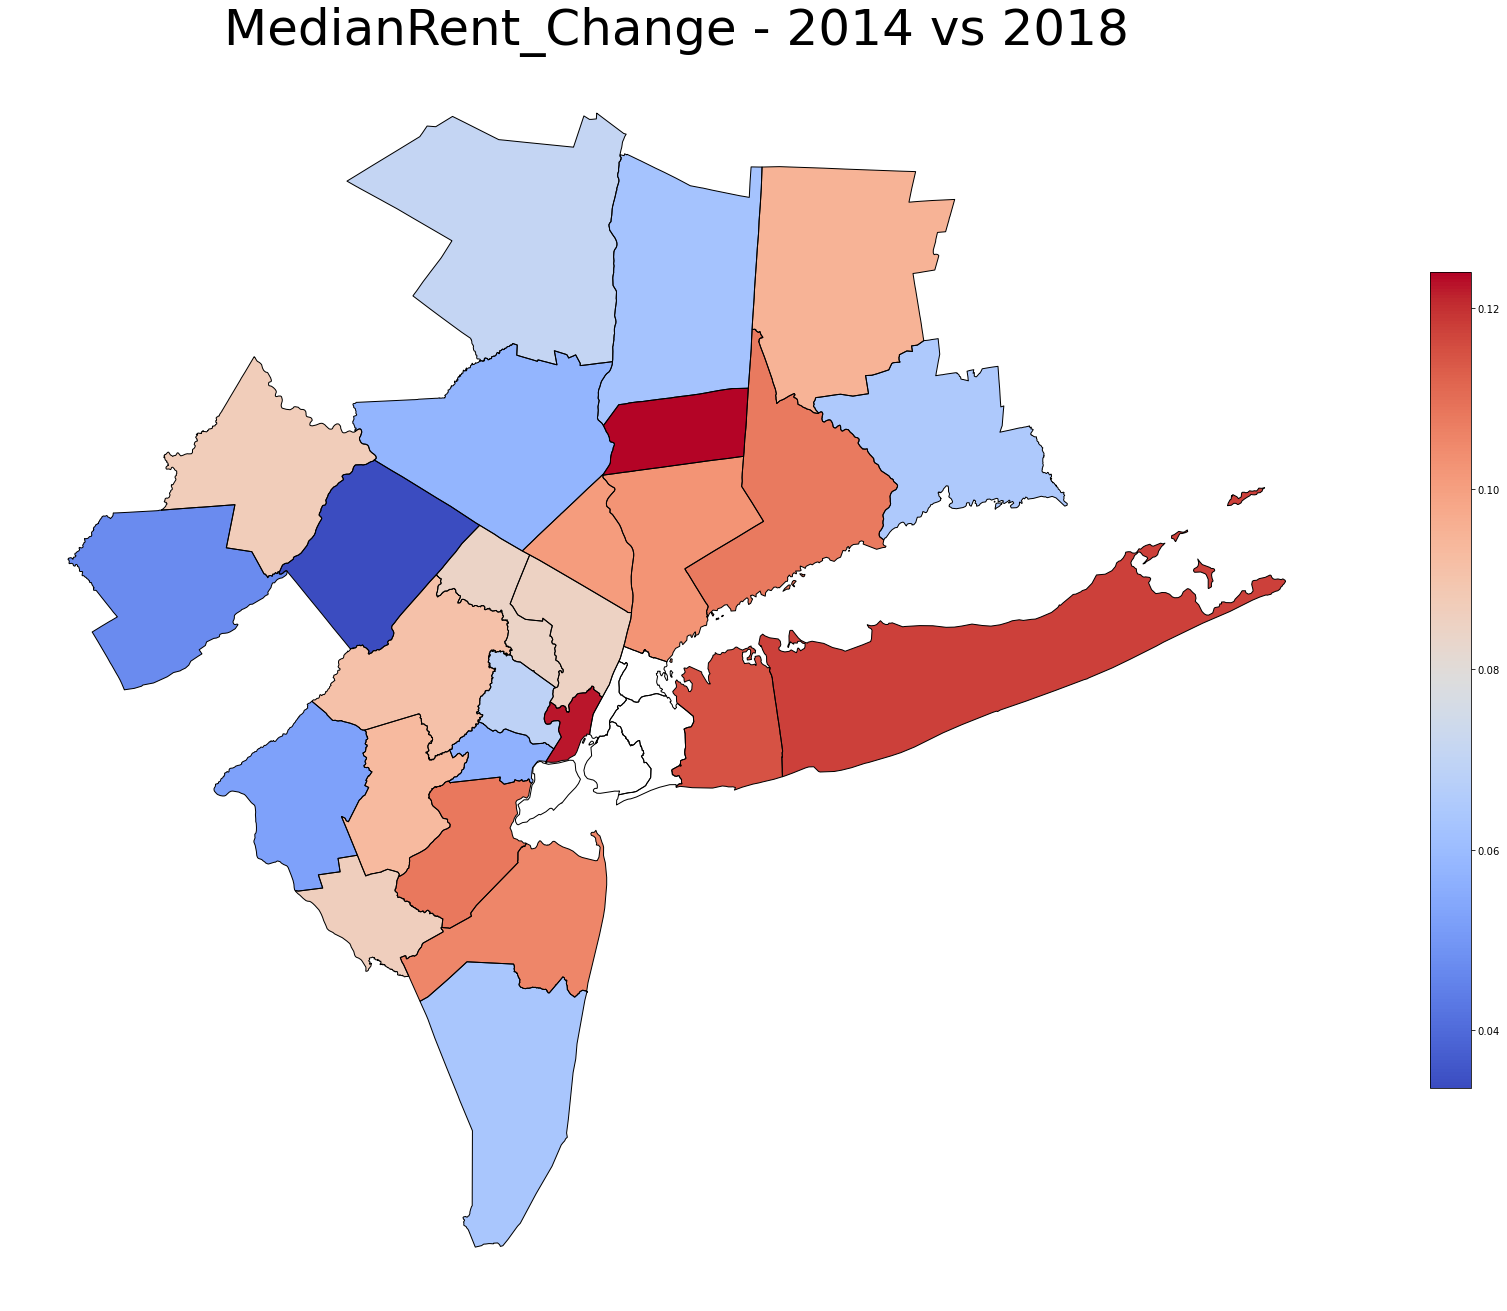

In [26]:
Topics = ['Total_Population','Commuter_Population','Mean_Household_Income','CommutingTime','WorkFromHomePopulation',
        'JobNumber','GDP','MedianNumberOfOwnedUnits','MedianRent']

for topic in Topics:
    ChangeCalculation(topic)

 <h2>
<code style="background:grey;color:black">Section 3. Conclusion
</code>
</h2>

We used the function coding to be able to create lots of maps in a short time. We decide to use similar coding for all our data sets.